In [1]:
import pandas as pd


file_path = "vdjdb_full.txt"
df = pd.read_csv(file_path, delimiter='\t')
df = df.drop_duplicates()
print(df.shape)


C:\Users\Christian\AppData\Local\Temp\ipykernel_8072\77240631.py:5: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter='\t')


(61636, 34)


In [2]:
epitopes = df['antigen.gene'].unique()
print(f'{len(df["antigen.gene"].unique())} epitopes')


269 epitopes


In [3]:
#cleaning, renaming and organising df

df_slim = df.iloc[:,[0,1,2,3,4,6,7,12]]
df_cleaned = df_slim.dropna(subset = ['cdr3.alpha','cdr3.beta'])
df_cleaned.rename(columns={'cdr3.alpha': 'cdr3_a_aa', 'cdr3.beta': 'cdr3_b_aa', 'v.alpha':'v_a_gene','j.alpha': 'j_a_gene','v.beta': 'v_b_gene','j.beta': 'j_b_gene','antigen.gene':'epitope'}, inplace=True)

C:\Users\Christian\AppData\Local\Temp\ipykernel_8072\3494573845.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.rename(columns={'cdr3.alpha': 'cdr3_a_aa', 'cdr3.beta': 'cdr3_b_aa', 'v.alpha':'v_a_gene','j.alpha': 'j_a_gene','v.beta': 'v_b_gene','j.beta': 'j_b_gene','antigen.gene':'epitope'}, inplace=True)


In [4]:
df_cleaned.head(10)

,cdr3_a_aa,v_a_gene,j_a_gene,cdr3_b_aa,v_b_gene,j_b_gene,species,epitope
0,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,Nef
2,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,Nef
3,CAVKASGSRLT,TRAV2*01,NaN,CASSYEPGQVSHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,Nef
4,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,CASSALASLNEQFF,TRBV14*01,TRBJ2-1*01,HomoSapiens,Nef
5,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,Nef
7,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,Nef
8,CAVKASGSRLT,TRAV2*01,NaN,CASSYEPGQVSHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,Nef
9,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,Nef
11,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,Nef
12,CAVKASGSRLT,TRAV2*01,NaN,CASSYEPGQVSHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,Nef


In [5]:
df_cleaned['combined_cdr3'] = df_cleaned.apply(lambda row: row['cdr3_a_aa'] + row['cdr3_b_aa'], axis=1)
df_cleaned['v_a_gene'] = df_cleaned['v_a_gene'].fillna('').astype(str)
df_cleaned['v_b_gene'] = df_cleaned['v_b_gene'].fillna('').astype(str)
df_cleaned['j_a_gene'] = df_cleaned['j_a_gene'].fillna('').astype(str)
df_cleaned['j_b_gene'] = df_cleaned['j_b_gene'].fillna('').astype(str)
df_cleaned['combined_v_a_gene'] = df_cleaned.apply(lambda row: row['v_a_gene'] + row['v_b_gene'], axis=1)
df_cleaned['combined_j_a_gene'] = df_cleaned.apply(lambda row: row['j_a_gene'] + row['j_b_gene'], axis=1)
df_cleaned = df_cleaned.drop(columns=['v_a_gene','v_b_gene','j_a_gene','j_b_gene'])
df_cleaned.head(10)

C:\Users\Christian\AppData\Local\Temp\ipykernel_8072\1939174745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['combined_cdr3'] = df_cleaned.apply(lambda row: row['cdr3_a_aa'] + row['cdr3_b_aa'], axis=1)
C:\Users\Christian\AppData\Local\Temp\ipykernel_8072\1939174745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['v_a_gene'] = df_cleaned['v_a_gene'].fillna('').astype(str)
C:\Users\Christian\AppData\Local\Temp\ipykernel_8072\1939174745.py:3: SettingWithCopyWarning: 
A value is

,cdr3_a_aa,cdr3_b_aa,species,epitope,combined_cdr3,combined_v_a_gene,combined_j_a_gene
0,CIVRAPGRADMRF,CASSYLPGQGDHYSNQPQHF,HomoSapiens,Nef,CIVRAPGRADMRFCASSYLPGQGDHYSNQPQHF,TRAV26-1*01TRBV13*01,TRAJ43*01TRBJ1-5*01
2,CAVPSGAGSYQLTF,CASSFEPGQGFYSNQPQHF,HomoSapiens,Nef,CAVPSGAGSYQLTFCASSFEPGQGFYSNQPQHF,TRAV20*01TRBV13*01,TRAJ28*01TRBJ1-5*01
3,CAVKASGSRLT,CASSYEPGQVSHYSNQPQHF,HomoSapiens,Nef,CAVKASGSRLTCASSYEPGQVSHYSNQPQHF,TRAV2*01TRBV13*01,TRBJ1-5*01
4,CAYRPPGTYKYIF,CASSALASLNEQFF,HomoSapiens,Nef,CAYRPPGTYKYIFCASSALASLNEQFF,TRAV38-2/DV8*01TRBV14*01,TRAJ40*01TRBJ2-1*01
5,CIVRAPGRADMRF,CASSYLPGQGDHYSNQPQHF,HomoSapiens,Nef,CIVRAPGRADMRFCASSYLPGQGDHYSNQPQHF,TRAV26-1*01TRBV13*01,TRAJ43*01TRBJ1-5*01
7,CAVPSGAGSYQLTF,CASSFEPGQGFYSNQPQHF,HomoSapiens,Nef,CAVPSGAGSYQLTFCASSFEPGQGFYSNQPQHF,TRAV20*01TRBV13*01,TRAJ28*01TRBJ1-5*01
8,CAVKASGSRLT,CASSYEPGQVSHYSNQPQHF,HomoSapiens,Nef,CAVKASGSRLTCASSYEPGQVSHYSNQPQHF,TRAV2*01TRBV13*01,TRBJ1-5*01
9,CIVRAPGRADMRF,CASSYLPGQGDHYSNQPQHF,HomoSapiens,Nef,CIVRAPGRADMRFCASSYLPGQGDHYSNQPQHF,TRAV26-1*01TRBV13*01,TRAJ43*01TRBJ1-5*01
11,CAVPSGAGSYQLTF,CASSFEPGQGFYSNQPQHF,HomoSapiens,Nef,CAVPSGAGSYQLTFCASSFEPGQGFYSNQPQHF,TRAV20*01TRBV13*01,TRAJ28*01TRBJ1-5*01
12,CAVKASGSRLT,CASSYEPGQVSHYSNQPQHF,HomoSapiens,Nef,CAVKASGSRLTCASSYEPGQVSHYSNQPQHF,TRAV2*01TRBV13*01,TRBJ1-5*01


In [6]:
import sys, os
import numpy as np
from Bio.Align import substitution_matrices
substitution_matrix = substitution_matrices.load('BLOSUM62')  # use matrix names to load
from sklearn.manifold import MDS

In [7]:
#parameter Settings
Ndim=16 #the optimal dimension for isometric representation is 16 
n0=Ndim*6
ZERO=np.zeros((Ndim,Ndim))
II=np.eye(Ndim)
M0=np.concatenate((np.concatenate((ZERO,ZERO, II),axis=1),np.concatenate((II, ZERO, ZERO),axis=1),np.concatenate((ZERO,II, ZERO),axis=1)))
## Construct 6-th order cyclic group
ZERO45=np.zeros((Ndim*3,Ndim*3))
#M6 is the determined omega matrix
M6=np.concatenate((np.concatenate((ZERO45,M0),axis=1),np.concatenate((M0, ZERO45),axis=1)))

In [8]:
#the adjusted blosum62 matrix, the diagonal valyes are set 4
bl62={'A':[4,-1,-2,-2,0,-1,-1,0,-2,-1,-1,-1,-1,-2,-1,1,0,-3,-2,0],
      'R':[-1,4,0,-2,-3,1,0,-2,0,-3,-2,2,-1,-3,-2,-1,-1,-3,-2,-3],
      'N':[-2,0,4,1,-3,0,0,0,1,-3,-3,0,-2,-3,-2,1,0,-4,-2,-3],
      'D':[-2,-2,1,4,-3,0,2,-1,-1,-3,-4,-1,-3,-3,-1,0,-1,-4,-3,-3],
      'C':[0,-3,-3,-3,4,-3,-4,-3,-3,-1,-1,-3,-1,-2,-3,-1,-1,-2,-2,-1],
      'Q':[-1,1,0,0,-3,4,2,-2,0,-3,-2,1,0,-3,-1,0,-1,-2,-1,-2],
      'E':[-1,0,0,2,-4,2,4,-2,0,-3,-3,1,-2,-3,-1,0,-1,-3,-2,-2],
      'G':[0,-2,0,-1,-3,-2,-2,4,-2,-4,-4,-2,-3,-3,-2,0,-2,-2,-3,-3],
      'H':[-2,0,1,-1,-3,0,0,-2,4,-3,-3,-1,-2,-1,-2,-1,-2,-2,2,-3],
      'I':[-1,-3,-3,-3,-1,-3,-3,-4,-3,4,2,-3,1,0,-3,-2,-1,-3,-1,3],
      'L':[-1,-2,-3,-4,-1,-2,-3,-4,-3,2,4,-2,2,0,-3,-2,-1,-2,-1,1],
      'K':[-1,2,0,-1,-3,1,1,-2,-1,-3,-2,4,-1,-3,-1,0,-1,-3,-2,-2],
      'M':[-1,-1,-2,-3,-1,0,-2,-3,-2,1,2,-1,4,0,-2,-1,-1,-1,-1,1],
      'F':[-2,-3,-3,-3,-2,-3,-3,-3,-1,0,0,-3,0,4,-4,-2,-2,1,3,-1],
      'P':[-1,-2,-2,-1,-3,-1,-1,-2,-2,-3,-3,-1,-2,-4,4,-1,-1,-4,-3,-2],
      'S':[1,-1,1,0,-1,0,0,0,-1,-2,-2,0,-1,-2,-1,4,1,-3,-2,-2],
      'T':[0,-1,0,-1,-1,-1,-1,-2,-2,-1,-1,-1,-1,-2,-1,1,4,-2,-2,0],
      'W':[-3,-3,-4,-4,-2,-2,-3,-2,-2,-3,-2,-3,-1,1,-4,-3,-2,4,2,-3],
      'Y':[-2,-2,-2,-3,-2,-1,-2,-3,2,-1,-1,-2,-1,3,-3,-2,-2,2,4,-1],
      'V':[0,-3,-3,-3,-1,-2,-2,-3,-3,3,1,-2,1,-1,-2,-2,0,-3,-1,4]}

In [16]:
#let X to be the collection of MDS encoded embedding vectors for each of amino acid, which has a dimensionality of 16
#THIS IS DEFINED IN GIANA AS DEAFULT VALUES
X=np.array([[-0.31230882, -0.53572156, -0.01949946, -0.12211268, -0.70947917,
        -0.42211092,  0.02783931,  0.02637933, -0.41760305,  0.21809875,
         0.53532768,  0.04833016,  0.07877711,  0.50464914, -0.26972087,
        -0.52416842],
       [ 0.29672002,  0.29005364,  0.18176298, -0.05103382, -0.34686519,
         0.58024228, -0.49282931,  0.62304281, -0.09575202,  0.30115555,
         0.09913529,  0.1577466 , -0.94391939, -0.10505925,  0.05482389,
         0.38409897],
       [-0.42212537,  0.12225749,  0.16279646,  0.60099009,  0.19734216,
         0.42819919, -0.33562418,  0.17036334,  0.4234109 ,  0.46681561,
        -0.50347222, -0.37936876,  0.1494825 ,  0.32176759,  0.28584684,
         0.68469861],
       [ 0.18599294, -0.44017825, -0.4476952 ,  0.34340976,  0.44603553,
         0.40974629, -0.60045935, -0.09056728,  0.22147919, -0.33029418,
         0.55635594, -0.54149972,  0.05459062,  0.57334159, -0.06227118,
         0.65299872],
       [-0.19010428,  0.64418792, -0.85286762,  0.21380295,  0.37639516,
        -0.67753593,  0.38751609,  0.55746524,  0.01443766,  0.1776535 ,
         0.62853954, -0.15048523,  0.55100206, -0.21426656,  0.3644061 ,
        -0.0018255 ],
       [ 0.7350723 ,  0.10111267,  0.55640019, -0.18226966,  0.51658102,
        -0.19321508, -0.46599027, -0.02989911,  0.4036196 , -0.11978213,
        -0.29837524, -0.30232765, -0.36738065, -0.1379793 ,  0.04362871,
         0.33553714],
       [ 0.41134047,  0.13512443,  0.62492322, -0.10120261, -0.03093491,
         0.23751917, -0.68338694,  0.05124762,  0.41533821,  0.46669353,
         0.31467277, -0.02427587,  0.15361135,  0.70595112, -0.27952632,
         0.32408931],
       [-0.33041265, -0.43860065, -0.5509376 , -0.04380843, -0.35160935,
         0.25134855,  0.53409314,  0.54850824,  0.59490287,  0.32669345,
        -0.45355268, -0.56317041, -0.55416297,  0.18117841, -0.71600849,
        -0.08989825],
       [-0.40366849,  0.10978974,  0.0280101 , -0.46667987, -0.45607028,
         0.54114052, -0.77552923, -0.10720425,  0.55252091, -0.34397153,
        -0.59813694,  0.15567728,  0.03071009, -0.02176143,  0.34442719,
         0.14681541],
       [ 0.19280422,  0.35777863,  0.06139255,  0.20081699, -0.30546596,
        -0.56901549, -0.15290953, -0.31181573, -0.74523217,  0.22296016,
        -0.39143832, -0.16474685,  0.58064427, -0.77386654,  0.19713107,
        -0.49477418],
       [-0.16133903,  0.22112761, -0.53162136,  0.34764073, -0.08522381,
        -0.2510216 ,  0.04699411, -0.25702389, -0.8739765 , -0.24171728,
        -0.24370533,  0.42193635,  0.41056913, -0.60378211, -0.65756832,
         0.0845203 ],
       [-0.34792144,  0.18450939,  0.77038332,  0.63868511, -0.06221681,
         0.11930421,  0.04895523, -0.22463059, -0.03268844, -0.58941354,
         0.11640045,  0.32384901, -0.42952779,  0.58119471,  0.07288662,
         0.26669673],
       [ 0.01834555, -0.16367754,  0.34900298,  0.45087949,  0.47073855,
        -0.37377404,  0.0606911 ,  0.2455703 , -0.55182937, -0.20261009,
         0.28325423, -0.04741146,  0.30565238, -0.62090653,  0.17528413,
        -0.60434975],
       [-0.55464981,  0.50918784, -0.21371646, -0.63996967, -0.37656862,
         0.27852662,  0.3287838 , -0.56800869,  0.23260763, -0.20653106,
         0.63261439, -0.22666691,  0.00726302, -0.60125196,  0.07139961,
        -0.35086639],
       [ 0.94039731, -0.25999326,  0.43922549, -0.485738  , -0.20492235,
        -0.26005626,  0.68776626,  0.57826888, -0.05973995, -0.1193658 ,
        -0.12102433, -0.22091354,  0.43427913,  0.71447886,  0.32745991,
         0.03466398],
       [-0.13194625, -0.12262688,  0.18029209,  0.16555524,  0.39594125,
        -0.58110665,  0.16161717,  0.0839783 ,  0.0911945 ,  0.34546976,
        -0.29415349,  0.29891936, -0.60834721,  0.5943593 , -0.29473819,
         0.4864154 ],
       [ 0.40850093, -0.4638894 , -0.39732987, -0.01972861,  0.51189582,
         0.10176704,  0.37528519, -0.41479418, -0.1932531 ,  0.54732221,
        -0.11876511,  0.32843973, -0.259283  ,  0.59500132,  0.35168375,
        -0.21733727],
       [-0.50627723, -0.1973602 , -0.02339884, -0.66846048,  0.62696606,
         0.60049717,  0.69143364, -0.48053591,  0.17812208, -0.58481821,
        -0.23551415, -0.06229112,  0.20993116, -0.72485884,  0.34375662,
        -0.23539168],
       [-0.51388312, -0.2788953 ,  0.00859533, -0.5247195 , -0.18021544,
         0.28372911,  0.10791359,  0.13033494,  0.34294013, -0.70310089,
        -0.13245433,  0.48661081,  0.08451644, -0.69990992,  0.0408274 ,
        -0.47204888],
       [ 0.68546275,  0.22581365, -0.32571833,  0.34394298, -0.43232367,
        -0.5041842 ,  0.04784017, -0.53067936, -0.50049908,  0.36874221,
         0.22429186,  0.4616482 ,  0.11159174, -0.26827959, -0.39372848,
        -0.40987423]])

In [17]:
#let the dictionary variable bl62np represent the extended embedding vectors (demensionality 16*6) of all 20 amina acids.
bl62np={}
vkk=list(bl62.keys())
for ii in range(20):
    kk=vkk[ii]
    bl62np[kk]=np.array(list(X[ii,])+[0]*Ndim*5)    

In [18]:
#encodethe CDR3 sequences into 96 dimensional space
def EncodingCDR3(s, M, n0):
    sL=list(s)
    x=np.array([0]*n0)
    for ii in range(len(sL)):
        x = np.dot(M, (x+bl62np[sL[ii]]))
    return x

In [20]:
df_cdr3 = df_cleaned["combined_cdr3"]
seq1_code = EncodingCDR3(df_cdr3.iloc[1], M6, n0)
print(seq1_code)


[-0.63833265 -1.39095328  0.04018022 -0.57538852 -1.24888415  0.28110967
  1.02198812  1.45385473  0.8839109   0.18914112 -0.67517588 -0.62851174
  0.19289221  1.02216408 -0.33159521 -0.36675296 -0.01371327 -1.03869383
 -1.01397898 -0.06015889 -0.59742361 -0.58948741  1.96456382  1.50223977
  0.34728379  0.63777358 -1.56598851 -0.62639865 -0.87182489  1.06741287
 -2.05686358  0.42580318 -1.70358242 -0.4991155  -0.12262487 -1.89849276
 -2.10487777  1.17015305 -0.46028633  0.08125719  1.7207067  -0.24211775
  0.29847089 -0.12349494 -0.19928496  0.06885536 -0.80860148 -0.96607722
 -0.46813949  0.76406531 -1.14072968 -1.39024734 -0.05774441 -0.63404165
  0.98221792 -0.9968661   0.27241637  0.41023021  2.01195565 -0.52937681
  0.01764156 -0.45509932  0.63279691 -1.10952683  0.61721347  0.87394239
 -0.59249274 -0.23685126  0.15446302 -2.32546307  1.77514066  0.20500267
 -0.13080474  0.91143837  0.77611448  0.46142124 -0.11255847  0.81939935
 -0.21993924  0.24492866  1.9413244   0.05808425  2

In [27]:
encoded_df = pd.DataFrame()

for i in range(0, len(df_cdr3)):
    #encodde with giana matrix
    encoded_seq = EncodingCDR3(df_cdr3.iloc[i], M6, n0)
    encoded_df = encoded_df.append(pd.Series(encoded_seq), ignore_index=True)

print(encoded_df.shape)

C:\Users\Christian\AppData\Local\Temp\ipykernel_8072\2246219287.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  encoded_df = encoded_df.append(pd.Series(encoded_seq), ignore_index=True)
C:\Users\Christian\AppData\Local\Temp\ipykernel_8072\2246219287.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  encoded_df = encoded_df.append(pd.Series(encoded_seq), ignore_index=True)


             0         1         2         3         4         5         6   \
0      0.663714 -0.049381  0.633557  0.876652  1.209035  0.643866 -1.733286   
1     -0.638333 -1.390953  0.040180 -0.575389 -1.248884  0.281110  1.021988   
2     -0.263254 -0.557605  1.060281  0.627718  0.796327 -1.349340 -0.450541   
3     -0.344487  0.573064  0.600817  1.100847 -0.098365 -0.132582 -0.235263   
4      0.663714 -0.049381  0.633557  0.876652  1.209035  0.643866 -1.733286   
...         ...       ...       ...       ...       ...       ...       ...   
30471 -0.231698 -1.718685 -0.855929 -0.323151  0.068237  0.373132 -0.089421   
30472 -0.516038 -0.233166 -1.106900  0.672952  0.376154 -0.569681  0.455016   
30473  0.301209 -0.805567 -1.196354  0.836877  1.268649 -0.320615 -0.016563   
30474  1.176859  0.300726  0.761471  0.148657  1.343879 -1.218558 -0.723369   
30475 -0.329775 -0.750952  0.148760  0.252799 -0.347165  0.064222 -0.239682   

             7         8         9   ...        86 

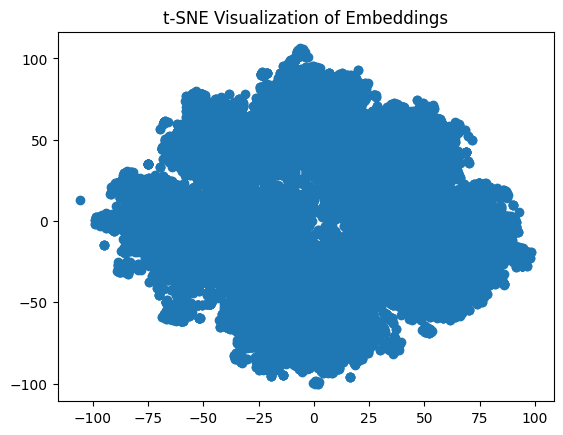

In [28]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

#tsne to reduce dimensionality to 2
tsne = TSNE(n_components=2)
embeddings_2d = tsne.fit_transform(encoded_df)


plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])
plt.title('t-SNE Visualization of Embeddings')
plt.show()


In [29]:
from sklearn.cluster import KMeans


epitopes = df_cleaned['epitope']
kmeans = KMeans(n_clusters=269) #269 epitopes
cluster_labels = kmeans.fit_predict(encoded_df)
encoded_df['cluster'] = cluster_labels
df_clustered = pd.concat([df_cleaned, encoded_df['cluster']], axis=1)


c:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


            cdr3_a_aa             cdr3_b_aa      species epitope  \
0       CIVRAPGRADMRF  CASSYLPGQGDHYSNQPQHF  HomoSapiens     Nef   
2      CAVPSGAGSYQLTF   CASSFEPGQGFYSNQPQHF  HomoSapiens     Nef   
3         CAVKASGSRLT  CASSYEPGQVSHYSNQPQHF  HomoSapiens     Nef   
4       CAYRPPGTYKYIF        CASSALASLNEQFF  HomoSapiens     Nef   
5       CIVRAPGRADMRF  CASSYLPGQGDHYSNQPQHF  HomoSapiens     Nef   
...               ...                   ...          ...     ...   
23775             NaN                   NaN          NaN     NaN   
23776             NaN                   NaN          NaN     NaN   
23777             NaN                   NaN          NaN     NaN   
23778             NaN                   NaN          NaN     NaN   
23779             NaN                   NaN          NaN     NaN   

                           combined_cdr3         combined_v_a_gene  \
0      CIVRAPGRADMRFCASSYLPGQGDHYSNQPQHF      TRAV26-1*01TRBV13*01   
2      CAVPSGAGSYQLTFCASSFEPGQGFYSNQPQHF   

In [31]:
df_clustered.head(10)

,cdr3_a_aa,cdr3_b_aa,species,epitope,combined_cdr3,combined_v_a_gene,combined_j_a_gene,cluster
0,CIVRAPGRADMRF,CASSYLPGQGDHYSNQPQHF,HomoSapiens,Nef,CIVRAPGRADMRFCASSYLPGQGDHYSNQPQHF,TRAV26-1*01TRBV13*01,TRAJ43*01TRBJ1-5*01,218.0
2,CAVPSGAGSYQLTF,CASSFEPGQGFYSNQPQHF,HomoSapiens,Nef,CAVPSGAGSYQLTFCASSFEPGQGFYSNQPQHF,TRAV20*01TRBV13*01,TRAJ28*01TRBJ1-5*01,178.0
3,CAVKASGSRLT,CASSYEPGQVSHYSNQPQHF,HomoSapiens,Nef,CAVKASGSRLTCASSYEPGQVSHYSNQPQHF,TRAV2*01TRBV13*01,TRBJ1-5*01,29.0
4,CAYRPPGTYKYIF,CASSALASLNEQFF,HomoSapiens,Nef,CAYRPPGTYKYIFCASSALASLNEQFF,TRAV38-2/DV8*01TRBV14*01,TRAJ40*01TRBJ2-1*01,218.0
5,CIVRAPGRADMRF,CASSYLPGQGDHYSNQPQHF,HomoSapiens,Nef,CIVRAPGRADMRFCASSYLPGQGDHYSNQPQHF,TRAV26-1*01TRBV13*01,TRAJ43*01TRBJ1-5*01,16.0
7,CAVPSGAGSYQLTF,CASSFEPGQGFYSNQPQHF,HomoSapiens,Nef,CAVPSGAGSYQLTFCASSFEPGQGFYSNQPQHF,TRAV20*01TRBV13*01,TRAJ28*01TRBJ1-5*01,218.0
8,CAVKASGSRLT,CASSYEPGQVSHYSNQPQHF,HomoSapiens,Nef,CAVKASGSRLTCASSYEPGQVSHYSNQPQHF,TRAV2*01TRBV13*01,TRBJ1-5*01,16.0
9,CIVRAPGRADMRF,CASSYLPGQGDHYSNQPQHF,HomoSapiens,Nef,CIVRAPGRADMRFCASSYLPGQGDHYSNQPQHF,TRAV26-1*01TRBV13*01,TRAJ43*01TRBJ1-5*01,178.0
11,CAVPSGAGSYQLTF,CASSFEPGQGFYSNQPQHF,HomoSapiens,Nef,CAVPSGAGSYQLTFCASSFEPGQGFYSNQPQHF,TRAV20*01TRBV13*01,TRAJ28*01TRBJ1-5*01,16.0
12,CAVKASGSRLT,CASSYEPGQVSHYSNQPQHF,HomoSapiens,Nef,CAVKASGSRLTCASSYEPGQVSHYSNQPQHF,TRAV2*01TRBV13*01,TRBJ1-5*01,178.0


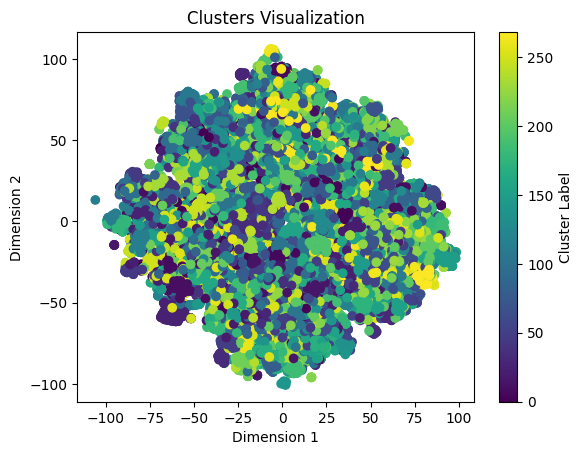

In [32]:
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=cluster_labels)
plt.title('Clusters Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Cluster Label')
plt.show()

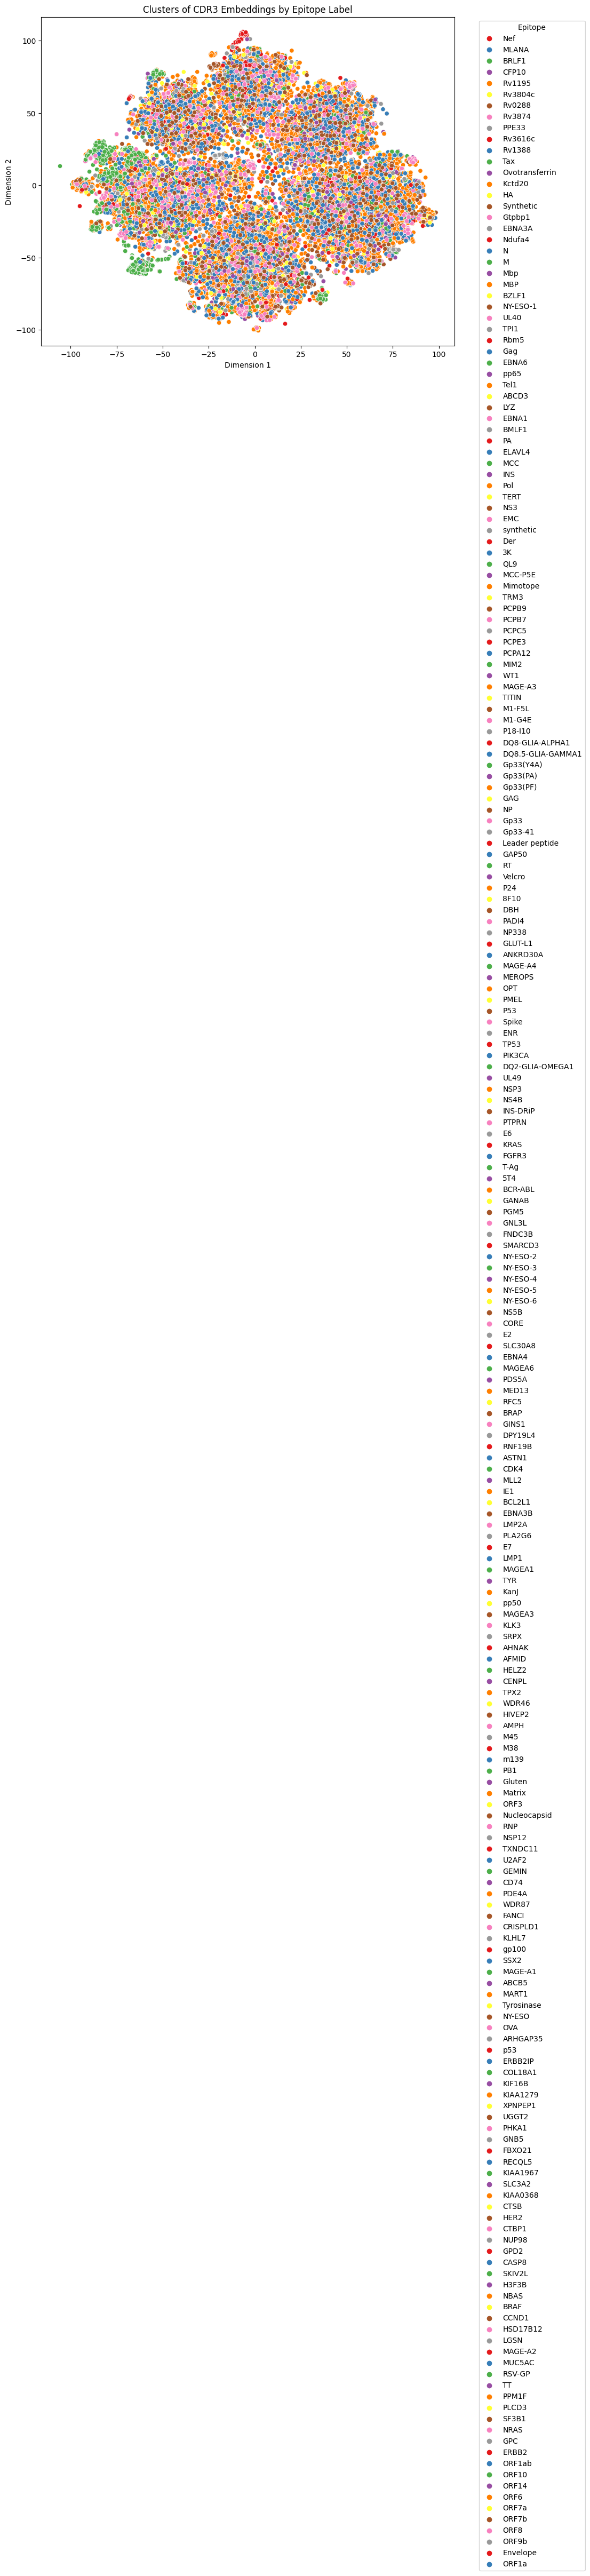

In [34]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=embeddings_2d[:, 0], y=embeddings_2d[:, 1], hue=df_cleaned['epitope'], palette='Set1')
plt.title('Clusters of CDR3 Embeddings by Epitope Label')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(title='Epitope', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
